Initial Weights: [ 0.5 -0.4]
Initial Bias: 0.1

Epoch 1
  Input: [0, 0]
    Dot Product (w·x): 0.0
    Dot Product + Bias: 0.1
    Predicted Output : 1
    Target Output (y): 0
    Error (y - ypred): -1
    Weight Update: [0.5, -0.4] -> [0.5, -0.4]
    Bias Update: 0.1 -> 0.0
  Input: [0, 1]
    Dot Product (w·x): -0.4
    Dot Product + Bias: -0.4
    Predicted Output : 0
    Target Output (y): 0
    Error (y - ypred): 0
    No update needed.
  Input: [1, 0]
    Dot Product (w·x): 0.5
    Dot Product + Bias: 0.5
    Predicted Output : 1
    Target Output (y): 0
    Error (y - ypred): -1
    Weight Update: [0.5, -0.4] -> [0.4, -0.4]
    Bias Update: 0.0 -> -0.1
  Input: [1, 1]
    Dot Product (w·x): 0.0
    Dot Product + Bias: -0.1
    Predicted Output : 0
    Target Output (y): 1
    Error (y - ypred): 1
    Weight Update: [0.4, -0.4] -> [0.5, -0.30000000000000004]
    Bias Update: -0.1 -> 0.0

Epoch 2
  Input: [0, 0]
    Dot Product (w·x): 0.0
    Dot Product + Bias: 0.0
    Predicted

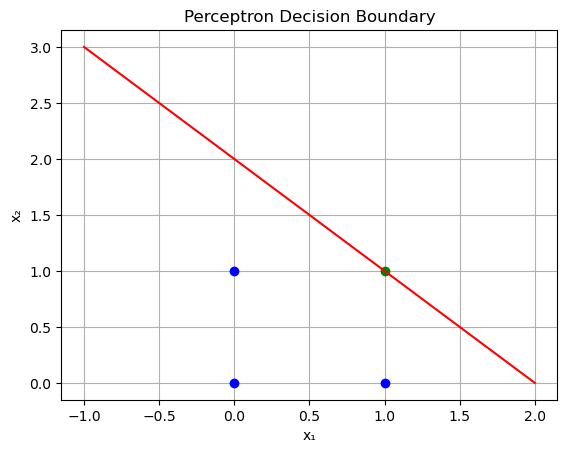

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def step(z):
    return 1 if z >= 0 else 0

weights = np.array([0.5, -0.4])
bias = 0.1
learning_rate = 0.1

data = [
    (np.array([0, 0]), 0),
    (np.array([0, 1]), 0),
    (np.array([1, 0]), 0),
    (np.array([1, 1]), 1)A
]

print("Initial Weights:", weights)
print("Initial Bias:", bias)

for epoch in range(1, 21):
    print(f"\nEpoch {epoch}")
    errors = 0

    for x, y_true in data:
        dot = np.dot(weights, x)
        z = dot + bias
        y_pred = step(z)
        error = y_true - y_pred

        print(f"  Input: {x.tolist()}")
        print(f"    Dot Product (w·x): {round(dot, 2)}")
        print(f"    Dot Product + Bias: {round(z, 2)}")
        print(f"    Predicted Output : {y_pred}")
        print(f"    Target Output (y): {y_true}")
        print(f"    Error (y - ypred): {error}")

        if error != 0:
            w_old = weights.copy()
            b_old = bias
            weights += learning_rate * error * x
            bias += learning_rate * error
            print(f"    Weight Update: {w_old.tolist()} -> {weights.tolist()}")
            print(f"    Bias Update: {round(b_old, 2)} -> {round(bias, 2)}")
            errors += 1
        else:
            print("    No update needed.")

    if errors == 0:
        print("Converged early.")
        break

print("\nFinal Weights:", weights)
print("Final Bias:", bias)

# Plotting 
for x, y in data:
    marker = 'go' if y == 1 else 'bo'
    plt.plot(x[0], x[1], marker)

x1_vals = [-1, 2]
if weights[1] != 0:
    x2_vals = [-(weights[0] * x + bias) / weights[1] for x in x1_vals]
    plt.plot(x1_vals, x2_vals, 'r-')

plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Perceptron Decision Boundary")
plt.grid(True)
plt.show()